# Pandas pada Psicóloogos
![](https://numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png)

[pandas - Python Data Analysis Library](https://pandas.pydata.org/docs/)

# Numpy para Psicólogos
![](https://user-images.githubusercontent.com/50221806/85190325-2b3f4400-b26c-11ea-93f3-81a101614a88.png)

[Numerical Python](https://numpy.org/)

## Introducción a los DataSets

In [1]:
import pandas as pd
import numpy as np
# librería "glob" — Busca nombres de archivos que coincidan con un patrón.
from glob import glob as gg
# Libería "tqdm" para ver el progreso del o de los procesos
from tqdm import tqdm
# Para que "tqdm" funcione
import time

## 1er Dataset. Datos Inventados

In [2]:
# Búsqueda de las Bases
files_xlsx = gg('*.xlsx')
files_xlsx

['Ejemplo1.xlsx', 'Ejemplo2.xlsx', 'Ejemplo3.xlsx']

In [3]:
xlsx1 = pd.read_excel(files_xlsx[0])
xlsx1.head()
# ¿El ID lo queremos como índice?

,ID,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10
0,1,-313,-850,590,-171,-839,-277,770,-790,0.959602,699
1,2,473,473,-146,-292,-652,-774,-569,330,0.354079,-263
2,3,84,NaN,207,-56,-67,Falsedades,597,-752,0.820334,420
3,4,Nada,NaN,47,3,-422,0,-820,-699,0.428466,1983
4,5,322,859,NaN,-346,NaN,85,-627,835,0.467556,-273


In [4]:
xlsx1 = pd.read_excel(files_xlsx[0], index_col='ID')
xlsx1.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10
ID,,,,,,,,,,
1,-313,-850,590,-171,-839,-277,770,-790,0.959602,699
2,473,473,-146,-292,-652,-774,-569,330,0.354079,-263
3,84,NaN,207,-56,-67,Falsedades,597,-752,0.820334,420
4,Nada,NaN,47,3,-422,0,-820,-699,0.428466,1983
5,322,859,NaN,-346,NaN,85,-627,835,0.467556,-273


In [5]:
# Número de observaciones que tiene el dataset
xlsx1.shape #(filas, columnas)

(20, 10)

In [6]:
xlsx1.shape[0] #quiero solo las filas

20

In [7]:
xlsx1.shape[1] #quiero solo las columnas

10

In [8]:
# Pero deseo toda la información
xlsx1.info() #¿Cómo interpretar esta información?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    17 non-null     object 
 1   Var2    18 non-null     object 
 2   Var3    18 non-null     object 
 3   Var4    20 non-null     object 
 4   Var5    19 non-null     object 
 5   Var6    20 non-null     object 
 6   Var7    20 non-null     object 
 7   Var8    14 non-null     object 
 8   Var9    20 non-null     float64
 9   Var10   20 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.7+ KB


In [9]:
# Quiero saber solo las filas
xlsx1.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='ID')

In [10]:
# Quiero solo saber los nombres de las columnas
xlsx1.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10'],
      dtype='object')

In [11]:
print(xlsx1.Var1.unique())
print(' ')
print(list(xlsx1.Var1.unique()))

[-313 473 84 'Nada' 322 -860 700 247 -512 -386 610 -237 207 nan -671 977
 -865 -545]
 
[-313, 473, 84, 'Nada', 322, -860, 700, 247, -512, -386, 610, -237, 207, nan, -671, 977, -865, -545]


In [12]:
# Quiero saber los valores que convierte la columna Var1 en objeto
objetos = [tipo for tipo in xlsx1.Var1.unique() if type(tipo) == str]
objetos

['Nada']

In [13]:
objetos = []
for tipo in xlsx1.Var1.unique():
    if type(tipo) == str:
        objetos.append(tipo)
objetos

['Nada']

In [15]:
objetos = [tipo for tipo in xlsx1.Var5.unique() if type(tipo) == str]
objetos

['errores', 'Falsedades']

In [15]:
objetos = []
for tipo in xlsx1.Var5.unique():
    if type(tipo) == str:
        objetos.append(tipo)
objetos

['errores', 'Falsedades']

In [16]:
# Hacerlo por cada uno toma mucho recurso de tiempo ¿Cómo mejoramos esto?
objetos = []
for columna in xlsx1.columns:
    print('En la columna {}'.format(columna))
    for tipo in xlsx1[columna].unique():
        if type(tipo) == str:
            print(tipo)
            print(' ')
            objetos.append(tipo)
            
objetos

En la columna Var1
Nada
 
En la columna Var2
Nada
 
En la columna Var3
Mentiras
 
En la columna Var4
Falsedades
 
En la columna Var5
errores
 
Falsedades
 
En la columna Var6
Falsedades
 
errores
 
En la columna Var7
Mentiras
 
En la columna Var8
Falsedades
 
En la columna Var9
En la columna Var10


['Nada',
 'Nada',
 'Mentiras',
 'Falsedades',
 'errores',
 'Falsedades',
 'Falsedades',
 'errores',
 'Mentiras',
 'Falsedades']

In [17]:
objetos = set(objetos)
objetos

{'Falsedades', 'Mentiras', 'Nada', 'errores'}

In [18]:
objetos = list(set(objetos))
objetos

['Falsedades', 'Mentiras', 'errores', 'Nada']

In [19]:
lista1 = objetos
lista2 = np.empty(len(lista1))
print(lista2)

[2.00000000e+000 2.00000000e+000 9.88131292e-324 2.78134232e-309]


In [20]:
lista2[:] = np.nan
print(lista2)

[nan nan nan nan]


In [21]:
objetos3 = zip(lista1, lista2)
objetos4 = dict(objetos3)
objetos4

{'Falsedades': nan, 'Mentiras': nan, 'errores': nan, 'Nada': nan}

In [22]:
# Como debe de verse
objetos = []
for columna in xlsx1.columns:
    for tipo in xlsx1[columna].unique():
        if type(tipo) == str:
            objetos.append(tipo)
            
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))
objetos

{'Falsedades': nan, 'Mentiras': nan, 'errores': nan, 'Nada': nan}

In [23]:
xlsx1

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10
ID,,,,,,,,,,
1,-313,-850,590,-171,-839,-277,770,-790,0.959602,699
2,473,473,-146,-292,-652,-774,-569,330,0.354079,-263
3,84,NaN,207,-56,-67,Falsedades,597,-752,0.820334,420
4,Nada,NaN,47,3,-422,0,-820,-699,0.428466,1983
5,322,859,NaN,-346,NaN,85,-627,835,0.467556,-273
6,-860,727,816,504,-830,-868,-756,Falsedades,0.724022,750
7,700,-507,-544,-789,-864,129,418,716,0.508727,477
8,247,-677,841,-458,errores,-814,742,-620,0.110713,-280
9,-512,573,344,-262,-595,-67,304,298,0.572773,-651


In [24]:
xlsx1 = xlsx1.replace(objetos)
xlsx1

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10
ID,,,,,,,,,,
1,-313.0,-850.0,590.0,-171.0,-839.0,-277.0,770.0,-790.0,0.959602,699
2,473.0,473.0,-146.0,-292.0,-652.0,-774.0,-569.0,330.0,0.354079,-263
3,84.0,NaN,207.0,-56.0,-67.0,NaN,597.0,-752.0,0.820334,420
4,NaN,NaN,47.0,3.0,-422.0,0.0,-820.0,-699.0,0.428466,1983
5,322.0,859.0,NaN,-346.0,NaN,85.0,-627.0,835.0,0.467556,-273
6,-860.0,727.0,816.0,504.0,-830.0,-868.0,-756.0,NaN,0.724022,750
7,700.0,-507.0,-544.0,-789.0,-864.0,129.0,418.0,716.0,0.508727,477
8,247.0,-677.0,841.0,-458.0,NaN,-814.0,742.0,-620.0,0.110713,-280
9,-512.0,573.0,344.0,-262.0,-595.0,-67.0,304.0,298.0,0.572773,-651


## ¿Se acuerdan de las demás bases?

In [25]:
print(files_xlsx)

['Ejemplo1.xlsx', 'Ejemplo2.xlsx', 'Ejemplo3.xlsx']


### ¿Qué función aplicamos y cómo lo aplicamos para que haga todo de una buena vez?
#### ¿Se acuerdan del "Ciclo FOR"?

In [26]:
print(files_xlsx[0])
print(pd.read_excel(files_xlsx[0], index_col='ID').head())
print(' ')
print(files_xlsx[1])
print(pd.read_excel(files_xlsx[1], index_col='ID').head())
print(' ')
print(files_xlsx[2])
print(pd.read_excel(files_xlsx[2], index_col='ID').head())

Ejemplo1.xlsx
    Var1  Var2  Var3  Var4  Var5        Var6  Var7  Var8      Var9  Var10
ID                                                                       
1   -313  -850   590  -171  -839        -277   770  -790  0.959602    699
2    473   473  -146  -292  -652        -774  -569   330  0.354079   -263
3     84   NaN   207   -56   -67  Falsedades   597  -752  0.820334    420
4   Nada   NaN    47     3  -422           0  -820  -699  0.428466   1983
5    322   859   NaN  -346   NaN          85  -627   835  0.467556   -273
 
Ejemplo2.xlsx
       Var21     Var22     Var23     Var24     Var25     Var26      Var27  \
ID                                                                          
1   8.226895  2.938617  8.440861  2.633110  8.948942  5.390803  10.484627   
2   7.758571  2.675094  7.454070  2.176030  8.239736  5.073068   9.785837   
3   7.238483  2.648811  7.091948  2.015311  7.673448  4.830851   9.722650   
4   6.685766  1.681903  6.849771  1.677720  7.180970  4.156083   9.

In [27]:
for base in files_xlsx:
    print(base)

Ejemplo1.xlsx
Ejemplo2.xlsx
Ejemplo3.xlsx


In [28]:
for mi_base in tqdm(files_xlsx):
    print('Se arreglará el archivo {} como usted lo pidió'.format(mi_base))
    xlsx = pd.read_excel(mi_base, index_col='ID')
    objetos = []
    for columna in xlsx.columns:
        for tipo in xlsx[columna].unique():
            if type(tipo) == str:
                objetos.append(tipo)

    lista1 = list(set(objetos))
    lista2 = np.empty(len(lista1))
    lista2[:] = np.nan
    objetos = dict(zip(lista1, lista2))
    time.sleep(0.01)

100%|██████████| 3/3 [00:00<00:00, 19.54it/s]

Se arreglará el archivo Ejemplo1.xlsx como usted lo pidió
Se arreglará el archivo Ejemplo2.xlsx como usted lo pidió
Se arreglará el archivo Ejemplo3.xlsx como usted lo pidió


In [29]:
# ¿Son todos los objetos de todas las bases?
objetos

{'Balazos': nan,
 'Maldita': nan,
 'Guerras': nan,
 'Hora': nan,
 'Soberbia': nan,
 'Te ': nan,
 'Burlas': nan,
 'Que': nan,
 'No': nan,
 'Desvalorización': nan,
 'Conocí': nan,
 'Abrazos': nan,
 'La': nan}

In [30]:
# ¿Porqué está dando solo el archivo "Ejemplo3.xlsx?"
# ¿Y los demás?
xlsx

,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20
ID,,,,,,,,,,
1,1961,1925,1982,1939,1986,1920,1950,1935,1929,1935
2,1966,2000,1930,Abrazos,No,Balazos,1963,1982,1964,1894
3,1903,1936,1899,1921,1965,1948,2012,1996,1893,1906
4,1929,2011,1951,2004,1954,1949,1919,1986,1913,1915
5,1925,2000,1924,1997,1904,1901,1998,1936,1961,1948
6,1930,1908,2014,1961,1924,1957,1897,1967,1945,1919
7,1971,2000,1984,1926,1963,1896,2011,1985,1943,1904
8,1937,1907,1911,Maldita,La,Hora,Que,Te,Conocí,1993
9,1980,1912,1917,2009,2006,2007,1920,1939,1941,1940


In [31]:
xlsx.replace(objetos)

,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20
ID,,,,,,,,,,
1,1961.0,1925,1982.0,1939.0,1986.0,1920.0,1950.0,1935.0,1929.0,1935.0
2,1966.0,2000,1930.0,NaN,NaN,NaN,1963.0,1982.0,1964.0,1894.0
3,1903.0,1936,1899.0,1921.0,1965.0,1948.0,2012.0,1996.0,1893.0,1906.0
4,1929.0,2011,1951.0,2004.0,1954.0,1949.0,1919.0,1986.0,1913.0,1915.0
5,1925.0,2000,1924.0,1997.0,1904.0,1901.0,1998.0,1936.0,1961.0,1948.0
6,1930.0,1908,2014.0,1961.0,1924.0,1957.0,1897.0,1967.0,1945.0,1919.0
7,1971.0,2000,1984.0,1926.0,1963.0,1896.0,2011.0,1985.0,1943.0,1904.0
8,1937.0,1907,1911.0,NaN,NaN,NaN,NaN,NaN,NaN,1993.0
9,1980.0,1912,1917.0,2009.0,2006.0,2007.0,1920.0,1939.0,1941.0,1940.0


## Vamonos despacito

In [32]:
## Este script solo es para obtener los objetos

objetos = [] # Para los objetos que no nos sirve

for mi_base in tqdm(files_xlsx):
    print('Se arreglará el archivo {} como usted lo pidió'.format(mi_base))
    xlsx = pd.read_excel(mi_base, index_col='ID')
    #objetos = []
    for columna in xlsx.columns:
        for tipo in xlsx[columna].unique():
            if type(tipo) == str:
                objetos.append(tipo)
    time.sleep(0.01)

  0%|          | 0/3 [00:00<?, ?it/s]

Se arreglará el archivo Ejemplo1.xlsx como usted lo pidió
Se arreglará el archivo Ejemplo2.xlsx como usted lo pidió


100%|██████████| 3/3 [00:00<00:00,  9.06it/s]

Se arreglará el archivo Ejemplo3.xlsx como usted lo pidió


In [33]:
# Aquí hacemos nuestro diccionario de objetos a quitar
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))

In [34]:
objetos

{'Falsedades': nan,
 'Balazos': nan,
 'Maldita': nan,
 'Guerras': nan,
 'Nada': nan,
 'Soberbia': nan,
 'Abrazos': nan,
 'Hora': nan,
 'Te ': nan,
 'Que': nan,
 'No': nan,
 'Desvalorización': nan,
 'Burlas': nan,
 'errores': nan,
 'Conocí': nan,
 'Mentiras': nan,
 'La': nan}

In [41]:
## Concatenando bases
x1 = pd.read_excel(files_xlsx[0], index_col='ID')
print(x1.axes)
print(x1.shape)
print(' ')
x2 = pd.read_excel(files_xlsx[1], index_col='ID')
print(x2.axes)
print(x2.shape)
print(' ')
x3 = pd.read_excel(files_xlsx[2], index_col='ID')
print(x3.axes)
print(x3.shape)

[Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='ID'), Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10'],
      dtype='object')]
(20, 10)
 
[Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='ID'), Index(['Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28',
       'Var29', 'Var30'],
      dtype='object')]
(20, 10)
 
[Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='ID'), Index(['Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var18',
       'Var19', 'Var20'],
      dtype='object')]
(20, 10)


In [42]:
xlsx = pd.concat([x1, x2, x3])
xlsx
## ¿Qué pasó aquí?

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20
ID,,,,,,,,,,,,,,,,,,,,,
1,-313,-850,590,-171,-839,-277,770,-790,0.959602,699.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,473,473,-146,-292,-652,-774,-569,330,0.354079,-263.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,84,NaN,207,-56,-67,Falsedades,597,-752,0.820334,420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nada,NaN,47,3,-422,0,-820,-699,0.428466,1983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,322,859,NaN,-346,NaN,85,-627,835,0.467556,-273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-860,727,816,504,-830,-868,-756,Falsedades,0.724022,750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,700,-507,-544,-789,-864,129,418,716,0.508727,477.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,247,-677,841,-458,errores,-814,742,-620,0.110713,-280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-512,573,344,-262,-595,-67,304,298,0.572773,-651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
xlsx = pd.concat([x1, x2, x3], axis=1)
xlsx
## ¿Por qué se tiene que colocar el argumento de "axis=1"?

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20
ID,,,,,,,,,,,,,,,,,,,,,
1,-313,-850,590,-171,-839,-277,770,-790,0.959602,699,...,1961,1925,1982,1939,1986,1920,1950,1935,1929,1935
2,473,473,-146,-292,-652,-774,-569,330,0.354079,-263,...,1966,2000,1930,Abrazos,No,Balazos,1963,1982,1964,1894
3,84,NaN,207,-56,-67,Falsedades,597,-752,0.820334,420,...,1903,1936,1899,1921,1965,1948,2012,1996,1893,1906
4,Nada,NaN,47,3,-422,0,-820,-699,0.428466,1983,...,1929,2011,1951,2004,1954,1949,1919,1986,1913,1915
5,322,859,NaN,-346,NaN,85,-627,835,0.467556,-273,...,1925,2000,1924,1997,1904,1901,1998,1936,1961,1948
6,-860,727,816,504,-830,-868,-756,Falsedades,0.724022,750,...,1930,1908,2014,1961,1924,1957,1897,1967,1945,1919
7,700,-507,-544,-789,-864,129,418,716,0.508727,477,...,1971,2000,1984,1926,1963,1896,2011,1985,1943,1904
8,247,-677,841,-458,errores,-814,742,-620,0.110713,-280,...,1937,1907,1911,Maldita,La,Hora,Que,Te,Conocí,1993
9,-512,573,344,-262,-595,-67,304,298,0.572773,-651,...,1980,1912,1917,2009,2006,2007,1920,1939,1941,1940


In [44]:
xlsx.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27',
       'Var28', 'Var29', 'Var30', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15',
       'Var16', 'Var17', 'Var18', 'Var19', 'Var20'],
      dtype='object')

In [45]:
xlsx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    17 non-null     object 
 1   Var2    18 non-null     object 
 2   Var3    18 non-null     object 
 3   Var4    20 non-null     object 
 4   Var5    19 non-null     object 
 5   Var6    20 non-null     object 
 6   Var7    20 non-null     object 
 7   Var8    14 non-null     object 
 8   Var9    20 non-null     float64
 9   Var10   20 non-null     int64  
 10  Var21   19 non-null     float64
 11  Var22   13 non-null     float64
 12  Var23   19 non-null     float64
 13  Var24   19 non-null     float64
 14  Var25   20 non-null     float64
 15  Var26   19 non-null     float64
 16  Var27   20 non-null     float64
 17  Var28   19 non-null     float64
 18  Var29   19 non-null     float64
 19  Var30   19 non-null     float64
 20  Var11   20 non-null     object 
 21  Var12   20 non-null     int64  
 22  Var1

In [46]:
## Reemplazamos los objetos
xlsx = xlsx.replace(objetos)
xlsx

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20
ID,,,,,,,,,,,,,,,,,,,,,
1,-313.0,-850.0,590.0,-171.0,-839.0,-277.0,770.0,-790.0,0.959602,699,...,1961.0,1925,1982.0,1939.0,1986.0,1920.0,1950.0,1935.0,1929.0,1935.0
2,473.0,473.0,-146.0,-292.0,-652.0,-774.0,-569.0,330.0,0.354079,-263,...,1966.0,2000,1930.0,NaN,NaN,NaN,1963.0,1982.0,1964.0,1894.0
3,84.0,NaN,207.0,-56.0,-67.0,NaN,597.0,-752.0,0.820334,420,...,1903.0,1936,1899.0,1921.0,1965.0,1948.0,2012.0,1996.0,1893.0,1906.0
4,NaN,NaN,47.0,3.0,-422.0,0.0,-820.0,-699.0,0.428466,1983,...,1929.0,2011,1951.0,2004.0,1954.0,1949.0,1919.0,1986.0,1913.0,1915.0
5,322.0,859.0,NaN,-346.0,NaN,85.0,-627.0,835.0,0.467556,-273,...,1925.0,2000,1924.0,1997.0,1904.0,1901.0,1998.0,1936.0,1961.0,1948.0
6,-860.0,727.0,816.0,504.0,-830.0,-868.0,-756.0,NaN,0.724022,750,...,1930.0,1908,2014.0,1961.0,1924.0,1957.0,1897.0,1967.0,1945.0,1919.0
7,700.0,-507.0,-544.0,-789.0,-864.0,129.0,418.0,716.0,0.508727,477,...,1971.0,2000,1984.0,1926.0,1963.0,1896.0,2011.0,1985.0,1943.0,1904.0
8,247.0,-677.0,841.0,-458.0,NaN,-814.0,742.0,-620.0,0.110713,-280,...,1937.0,1907,1911.0,NaN,NaN,NaN,NaN,NaN,NaN,1993.0
9,-512.0,573.0,344.0,-262.0,-595.0,-67.0,304.0,298.0,0.572773,-651,...,1980.0,1912,1917.0,2009.0,2006.0,2007.0,1920.0,1939.0,1941.0,1940.0


In [47]:
xlsx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    16 non-null     float64
 1   Var2    17 non-null     float64
 2   Var3    17 non-null     float64
 3   Var4    19 non-null     float64
 4   Var5    17 non-null     float64
 5   Var6    18 non-null     float64
 6   Var7    19 non-null     float64
 7   Var8    13 non-null     float64
 8   Var9    20 non-null     float64
 9   Var10   20 non-null     int64  
 10  Var21   19 non-null     float64
 11  Var22   13 non-null     float64
 12  Var23   19 non-null     float64
 13  Var24   19 non-null     float64
 14  Var25   20 non-null     float64
 15  Var26   19 non-null     float64
 16  Var27   20 non-null     float64
 17  Var28   19 non-null     float64
 18  Var29   19 non-null     float64
 19  Var30   19 non-null     float64
 20  Var11   19 non-null     float64
 21  Var12   20 non-null     int64  
 22  Var1

In [48]:
## Queremos ordenar las variables
xlsx = xlsx.sort_index(axis = 1)
xlsx.axes
#¿Por qué las columnas están de manera diferente?

[Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
             20],
            dtype='int64', name='ID'),
 Index(['Var1', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16',
        'Var17', 'Var18', 'Var19', 'Var2', 'Var20', 'Var21', 'Var22', 'Var23',
        'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var3', 'Var30',
        'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9'],
       dtype='object')]

In [49]:
xlsx.describe()

,Var1,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,...,Var28,Var29,Var3,Var30,Var4,Var5,Var6,Var7,Var8,Var9
count,16.000000,20.000000,19.000000,20.000000,19.000000,17.000000,18.000000,18.000000,19.000000,19.000000,...,19.000000,19.000000,17.000000,19.000000,19.000000,17.000000,18.000000,19.000000,13.000000,20.000000
mean,-48.062500,197.450000,1954.631579,1952.750000,1965.263158,1962.058824,1949.500000,1949.333333,1948.631579,1959.736842,...,2.412791,3.599389,433.411765,3.069803,-75.842105,-267.058824,-220.333333,-179.947368,64.076923,0.499258
std,578.409598,959.319467,37.214410,39.435323,40.433542,38.954253,31.790213,33.210558,41.069332,35.577524,...,1.540922,2.435942,540.102775,1.634772,476.073438,539.232032,510.430268,607.291663,618.301095,0.216211
min,-865.000000,-955.000000,1893.000000,1900.000000,1899.000000,1907.000000,1893.000000,1896.000000,1893.000000,1895.000000,...,0.144162,0.125853,-853.000000,0.607891,-978.000000,-864.000000,-964.000000,-880.000000,-790.000000,0.110713
25%,-520.250000,-364.000000,1929.000000,1915.000000,1927.000000,1926.000000,1926.750000,1927.500000,1913.500000,1935.500000,...,1.287967,1.514115,207.000000,1.950482,-319.000000,-652.000000,-765.250000,-695.500000,-620.000000,0.347313
50%,-76.500000,-268.000000,1949.000000,1951.500000,1978.000000,1954.000000,1958.000000,1948.500000,1944.000000,1967.000000,...,2.279395,3.609155,590.000000,2.755617,-171.000000,-422.000000,-167.000000,-308.000000,330.000000,0.462216
75%,359.750000,711.750000,1979.000000,2000.000000,1993.500000,1997.000000,1970.250000,1968.250000,1986.500000,1985.500000,...,3.384477,5.642759,841.000000,3.991129,248.500000,38.000000,120.500000,406.500000,466.000000,0.668754
max,977.000000,2020.000000,2014.000000,2012.000000,2018.000000,2018.000000,2006.000000,2010.000000,2012.000000,2007.000000,...,5.354321,7.640019,995.000000,6.123552,991.000000,838.000000,568.000000,770.000000,835.000000,0.959602


In [58]:
# Ver por separado los descriptivos
conteo = xlsx.count()
print(conteo)

Var1     16
Var10    20
Var11    19
Var12    20
Var13    19
Var14    17
Var15    18
Var16    18
Var17    19
Var18    19
Var19    19
Var2     17
Var20    19
Var21    19
Var22    13
Var23    19
Var24    19
Var25    20
Var26    19
Var27    20
Var28    19
Var29    19
Var3     17
Var30    19
Var4     19
Var5     17
Var6     18
Var7     19
Var8     13
Var9     20
dtype: int64


In [59]:
tiene_nans = xlsx.isna()
print(tiene_nans)

     Var1  Var10  Var11  Var12  Var13  Var14  Var15  Var16  Var17  Var18  ...  \
ID                                                                        ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False   True   True   True  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4    True  False  False  False  False  False  False  False  False  False  ...   
5   False  False  False  False  False  False  False  False  False  False  ...   
6   False  False  False  False  False  False  False  False  False  False  ...   
7   False  False  False  False  False  False  False  False  False  False  ...   
8   False  False  False  False  False   True   True   True   True   True  ...   
9   False  False  False  False  False  False  False  False  False  False  ...   
10  False  False  False  False  False  False  False  False  False  False  ...   
11  False  False  False  Fal

In [60]:
cuantos_nan = xlsx.isna().sum()
print(cuantos_nan)

Var1     4
Var10    0
Var11    1
Var12    0
Var13    1
Var14    3
Var15    2
Var16    2
Var17    1
Var18    1
Var19    1
Var2     3
Var20    1
Var21    1
Var22    7
Var23    1
Var24    1
Var25    0
Var26    1
Var27    0
Var28    1
Var29    1
Var3     3
Var30    1
Var4     1
Var5     3
Var6     2
Var7     1
Var8     7
Var9     0
dtype: int64


In [61]:
conteo + cuantos_nan

Var1     20
Var10    20
Var11    20
Var12    20
Var13    20
Var14    20
Var15    20
Var16    20
Var17    20
Var18    20
Var19    20
Var2     20
Var20    20
Var21    20
Var22    20
Var23    20
Var24    20
Var25    20
Var26    20
Var27    20
Var28    20
Var29    20
Var3     20
Var30    20
Var4     20
Var5     20
Var6     20
Var7     20
Var8     20
Var9     20
dtype: int64

In [66]:
xlsx.mean()

Var1      -48.062500
Var10     197.450000
Var11    1954.631579
Var12    1952.750000
Var13    1965.263158
Var14    1962.058824
Var15    1949.500000
Var16    1949.333333
Var17    1948.631579
Var18    1959.736842
Var19    1947.894737
Var2      100.235294
Var20    1948.210526
Var21       3.582765
Var22       1.865558
Var23       3.985219
Var24       3.525582
Var25       4.303631
Var26       2.556237
Var27       5.159576
Var28       2.412791
Var29       3.599389
Var3      433.411765
Var30       3.069803
Var4      -75.842105
Var5     -267.058824
Var6     -220.333333
Var7     -179.947368
Var8       64.076923
Var9        0.499258
dtype: float64

In [67]:
xlsx.median()

Var1      -76.500000
Var10    -268.000000
Var11    1949.000000
Var12    1951.500000
Var13    1978.000000
Var14    1954.000000
Var15    1958.000000
Var16    1948.500000
Var17    1944.000000
Var18    1967.000000
Var19    1944.000000
Var2      434.000000
Var20    1944.000000
Var21       3.259060
Var22       1.681903
Var23       3.493387
Var24       3.130743
Var25       4.088834
Var26       2.248253
Var27       4.622659
Var28       2.279395
Var29       3.609155
Var3      590.000000
Var30       2.755617
Var4     -171.000000
Var5     -422.000000
Var6     -167.000000
Var7     -308.000000
Var8      330.000000
Var9        0.462216
dtype: float64

In [70]:
xlsx.mode()

,Var1,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,...,Var28,Var29,Var3,Var30,Var4,Var5,Var6,Var7,Var8,Var9
0,-865.0,-955,1929.0,2000.0,1899.0,1907.0,1954.0,1936.0,1998.0,1895.0,...,0.144162,0.125853,-853.0,0.607891,-171.0,-864.0,-964.0,-880.0,-790.0,0.110713
1,-860.0,-944,NaN,NaN,1907.0,1911.0,NaN,1963.0,NaN,1903.0,...,0.294609,0.152208,-544.0,0.778558,NaN,NaN,-868.0,-855.0,-752.0,0.179239
2,-671.0,-886,NaN,NaN,1911.0,1918.0,NaN,1970.0,NaN,1905.0,...,0.610383,0.261503,-146.0,1.198318,NaN,NaN,-854.0,-850.0,-699.0,0.287966
3,-545.0,-651,NaN,NaN,1917.0,1921.0,NaN,NaN,NaN,1933.0,...,0.839837,1.001937,47.0,1.627964,NaN,NaN,-814.0,-820.0,-620.0,0.323835
4,-512.0,-424,NaN,NaN,1924.0,1926.0,NaN,NaN,NaN,1935.0,...,0.883725,1.292644,207.0,1.915581,NaN,NaN,-774.0,-756.0,-408.0,0.327014
5,-386.0,-344,NaN,NaN,1930.0,1939.0,NaN,NaN,NaN,1936.0,...,1.692208,1.735587,344.0,1.985383,NaN,NaN,-739.0,-635.0,298.0,0.354079
6,-313.0,-336,NaN,NaN,1949.0,1946.0,NaN,NaN,NaN,1939.0,...,1.727131,2.671089,374.0,2.161510,NaN,NaN,-360.0,-627.0,330.0,0.422481
7,-237.0,-288,NaN,NaN,1951.0,1947.0,NaN,NaN,NaN,1942.0,...,1.792313,2.738624,486.0,2.622703,NaN,NaN,-277.0,-599.0,336.0,0.428466
8,84.0,-280,NaN,NaN,1971.0,1954.0,NaN,NaN,NaN,1961.0,...,1.794001,3.214647,590.0,2.639632,NaN,NaN,-267.0,-569.0,409.0,0.445474
9,207.0,-273,NaN,NaN,1978.0,1961.0,NaN,NaN,NaN,1967.0,...,2.279395,3.609155,741.0,2.755617,NaN,NaN,-67.0,-308.0,466.0,0.456875


In [72]:
xlsx.quantile(.12)

Var1     -708.800000
Var10    -820.200000
Var11    1911.560000
Var12    1907.280000
Var13    1911.960000
Var14    1917.440000
Var15    1904.520000
Var16    1912.320000
Var17    1904.480000
Var18    1909.480000
Var19    1913.000000
Var2     -680.360000
Var20    1906.800000
Var21       0.593118
Var22       0.713413
Var23       1.125805
Var24       1.573336
Var25       1.386885
Var26       0.794176
Var27       1.480935
Var28       0.647096
Var29       0.379972
Var3     -177.840000
Var30       1.267061
Var4     -553.760000
Var5     -841.000000
Var6     -852.400000
Var7     -845.200000
Var8     -728.680000
Var9        0.298009
Name: 0.12, dtype: float64

In [73]:
xlsx.sem()

Var1     144.602399
Var10    214.510354
Var11      8.537571
Var12      8.818006
Var13      9.276091
Var14      9.447794
Var15      7.493025
Var16      7.827804
Var17      9.421951
Var18      8.162044
Var19      7.703533
Var2     143.981936
Var20      8.341252
Var21      0.633664
Var22      0.294162
Var23      0.583970
Var24      0.460141
Var25      0.565617
Var26      0.350024
Var27      0.727704
Var28      0.353512
Var29      0.558843
Var3     130.994164
Var30      0.375043
Var4     109.218737
Var5     130.782978
Var6     120.309568
Var7     139.322263
Var8     171.485869
Var9       0.048346
dtype: float64

## 2do Dataset. Datos de la Comunidad.

In [75]:
files_csv = sorted(gg('*.csv'))
files_csv

['iris.csv', 'iris1.csv', 'iris2.csv', 'iris3.csv']

In [76]:
iris = pd.read_csv(files_csv[0])
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [77]:
iris.columns = iris.columns.str.replace('.', '_')
iris

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [87]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [113]:
# ¿Qué es un Series? y ¿Qué es un DataFrame?
# Uso del método iloc y loc


### Método iloc

## SERIES
#ejemplo = iris.iloc[0] # solo valores de la fila
#ejemplo = iris.iloc[0, 0] # solo valores de la fila y la columna
#ejemplo = iris.iloc[:, 0] # solo valores de toda la fila y 1 columna

## DATAFRAME
ejemplo = iris.iloc[:, 0:1] # No es lo mismo que [:, 0]
ejemplo = iris.iloc[:20, 0:2]

In [114]:
print(type(ejemplo))
ejemplo

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [ ]:
# Flitrar las bases


In [81]:
import pandas.plotting as pdplt
import matplotlib.pyplot as plt

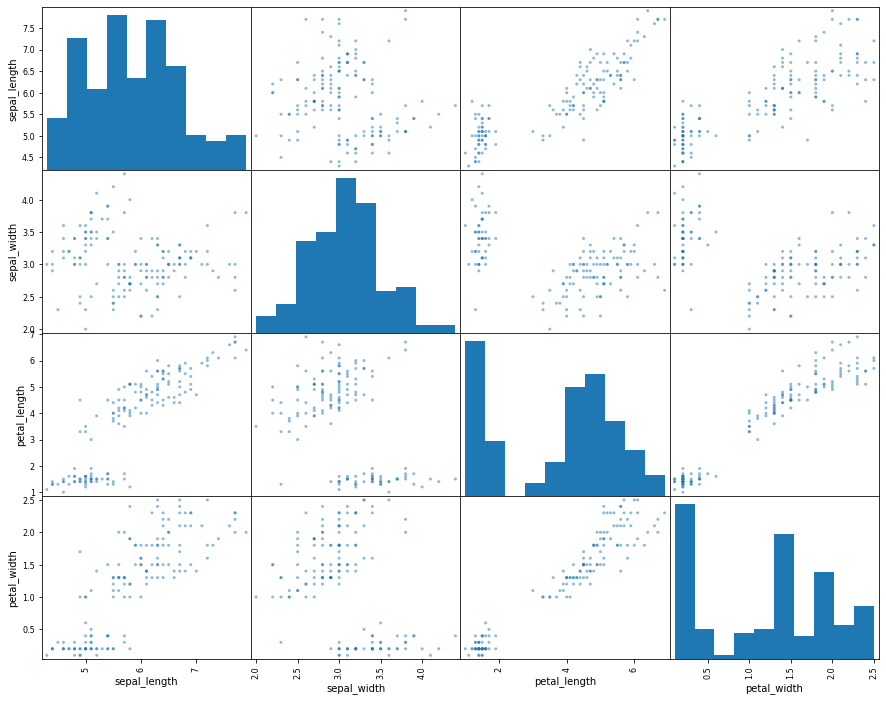

In [86]:
pdplt.scatter_matrix(iris[iris.columns[0:4]], figsize=(15, 12))
plt.show()

In [4]:
# Búsqueda de las Bases Reales
files_txt = gg('/Users/javier/Google Drive/Curso Python Pandas 2020/Scripts/*.txt')